In [1]:
import statsmodels.api as sm
import statsmodels.stats.api as sms

C:\Users\karagiag\AppData\Local\Continuum\Anaconda2\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('C:/Users/karagiag/Downloads/aapl.csv', index_col=0, parse_dates=True)

In [4]:
data = data.drop(data.columns[[0,1,2,4]],axis=1)

In [5]:
data = data.sort_index()

In [6]:
data['ret']=np.log(data['Close']/data['Close'].shift(1))

In [7]:
data.head()

,Close,ret
Date,,
2011-01-03,47.08,NaN
2011-01-04,47.33,0.005296
2011-01-05,47.71,0.007997
2011-01-06,47.68,-0.000629
2011-01-07,48.02,0.007106


In [8]:
factors = pd.read_csv('C:/Users/karagiag/Downloads/FF_Factors_daily.csv')

In [9]:
factors.head()

,Date,Mkt-RF,SMB,HML,RF
0,19260701,0.10,-0.24,-0.28,0.009
1,19260702,0.45,-0.32,-0.08,0.009
2,19260706,0.17,0.27,-0.35,0.009
3,19260707,0.09,-0.59,0.03,0.009
4,19260708,0.21,-0.36,0.15,0.009


In [10]:
factors['Date'] = pd.to_datetime(factors['Date'],format='%Y%m%d', errors='coerce')

In [11]:
factors.tail()

,Date,Mkt-RF,SMB,HML,RF
24054,2017-08-29,0.10,0.13,-0.39,0.003
24055,2017-08-30,0.53,0.02,-0.31,0.003
24056,2017-08-31,0.62,0.48,-0.41,0.003
24057,NaT,NaN,NaN,NaN,NaN
24058,NaT,NaN,NaN,NaN,NaN


In [12]:
factors = factors.drop(factors.tail(2).index)

In [13]:
factors.tail()

,Date,Mkt-RF,SMB,HML,RF
24052,2017-08-25,0.18,0.12,0.57,0.003
24053,2017-08-28,0.08,0.35,-0.74,0.003
24054,2017-08-29,0.10,0.13,-0.39,0.003
24055,2017-08-30,0.53,0.02,-0.31,0.003
24056,2017-08-31,0.62,0.48,-0.41,0.003


In [14]:
factors=factors.set_index('Date')

In [15]:
data = pd.concat([data,factors],join='inner', axis=1)

In [16]:
data.head()

,Close,ret,Mkt-RF,SMB,HML,RF
Date,,,,,,
2011-01-03,47.08,NaN,1.18,0.53,0.79,0.0
2011-01-04,47.33,0.005296,-0.26,-1.38,0.11,0.0
2011-01-05,47.71,0.007997,0.59,0.61,0.14,0.0
2011-01-06,47.68,-0.000629,-0.15,-0.06,-0.32,0.0
2011-01-07,48.02,0.007106,-0.21,-0.26,-0.31,0.0


In [17]:
data = data.drop(data.head(1).index)

In [18]:
data.head()

,Close,ret,Mkt-RF,SMB,HML,RF
Date,,,,,,
2011-01-04,47.33,0.005296,-0.26,-1.38,0.11,0.0
2011-01-05,47.71,0.007997,0.59,0.61,0.14,0.0
2011-01-06,47.68,-0.000629,-0.15,-0.06,-0.32,0.0
2011-01-07,48.02,0.007106,-0.21,-0.26,-0.31,0.0
2011-01-10,48.92,0.018569,-0.02,0.56,-0.15,0.0


In [19]:
data['ret']=data['ret']-data['RF']

In [320]:
X = data[data.columns[2:5]]
y = data['ret']

In [321]:
model = sm.OLS(y,X)

In [322]:
results=model.fit()

In [323]:
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                    ret   R-squared:                       0.314
Model:                            OLS   Adj. R-squared:                  0.313
Method:                 Least Squares   F-statistic:                     230.1
Date:                Fri, 03 Nov 2017   Prob (F-statistic):          7.03e-123
Time:                        21:05:55   Log-Likelihood:                 4338.5
No. Observations:                1509   AIC:                            -8671.
Df Residuals:                    1506   BIC:                            -8655.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Mkt-RF         0.0097      0.000     24.786      0.0

In [23]:
#The Durbin-Watson test statistic tests the null hypothesis that the residuals from an
#ordinary least-squares regression are not autocorrelated against the alternative that the
#residuals follow an AR1 process. The Durbin-Watson statistic ranges in value from 0
#to 4. A value near 2 indicates non-autocorrelation; a value toward 0 indicates positive
#autocorrelation; a value toward 4 indicates negative autocorrelation
# A value between the lower and upper bound means the test is inconclusive

In [24]:
# Jarque–Bera tests whether sample data have the skewness and kurtosis matching a normal distribution
#In order to interpret results, you may need to do a little comparison
#Checking p-values is always a good idea. For example, a tiny p-value and a large chi-square value from this test 
#means that you can reject the null hypothesis that the data is normally distributed.

In [25]:
sms.diagnostic.kstest_normal(results.resid)

(0.06411965773774797, 6.3158073932795447e-16)

In [26]:
#The Kolmogorov-Smirnov test is defined by:
#H0:	The data follow a specified distribution
#Ha:	The data do not follow the specified distribution
# Significance level:  α = 0.01
# Critical value:  1.358/√n = 0.034    
# Critical region:  Reject H0 if D > 0.034 or
# p-value=6.315807393279096e-16 < a (so we reject the Null of normality)

In [27]:
sms.omni_normtest(results.resid)

NormaltestResult(statistic=343.44032266634525, pvalue=2.6477775860955586e-75)

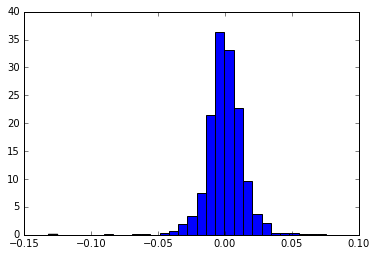

In [305]:
%matplotlib inline
plt.hist(results.resid, normed=True, bins=30);

In [29]:
# when kurtosis>3 (here is 12) distribution is leptokurtic

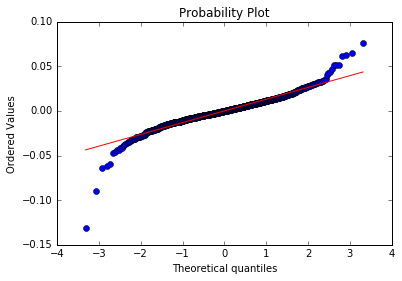

In [306]:
import scipy.stats as stats
# Graphical test: if the data lie on a line, they are pretty much
# normally distributed
stats.probplot(results.resid, plot=plt);

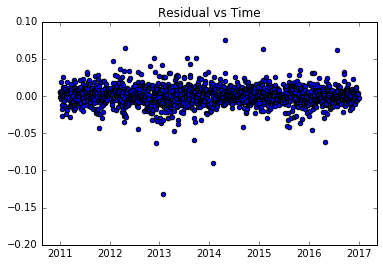

In [31]:
plt.scatter(data.index,results.resid)
# Residuals look independent
plt.title('Residual vs Time')

In [324]:
#Checking for Equal (constant) Variance, i.e. heteroskedasticity by plotting
#Plot residuals against fitted values 
# First fit values
y_hat = results.predict(X)

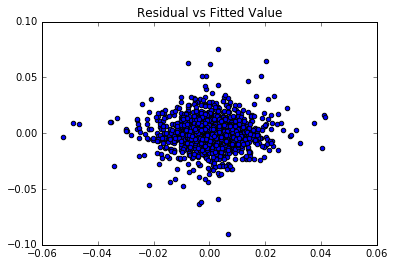

In [327]:
plt.scatter(y_hat,results.resid);
plt.title('Residual vs Fitted Value')
plt.ylim([-.10,0.10]);
plt.xlim([-.06,0.06]);

In [34]:
#Checking for Equal (constant) Variance, i.e. heteroskedasticity with Tests
#Breusch-Pagan test:
name = ['Lagrange multiplier statistic', 'p-value','f-value', 'f p-value']
test = sms.het_breuschpagan(results.resid,results.model.exog)
print (name,test)

(['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value'], (0.37733252485290103, 0.82806281625977229, 0.1255588501750225, 0.94500148966327358))


In [328]:
results.model.exog

array([[-0.26, -1.38,  0.11],
       [ 0.59,  0.61,  0.14],
       [-0.15, -0.06, -0.32],
       ..., 
       [-0.87, -0.27,  0.09],
       [-0.04,  0.13, -0.31],
       [-0.52, -0.11,  0.2 ]])

In [35]:
# If the test statistic has a p-value below an appropriate threshold (e.g. p<0.05) 
#then the null hypothesis of homoskedasticity is rejected and heteroskedasticity assumed.

In [36]:
# Checking for Linearity in the data
# By plotting (here I have 3 factors so difficult) or by test statistics
# Harvey_collier Test (checks if null: residuals have a mean of 0)
test = sms.linear_harvey_collier(results)
print test

Ttest_1sampResult(statistic=-0.074727913506813529, pvalue=0.94044112906467026)


In [37]:
# Second test for cheking linearity is the 
# Rainbow Test()
test = sms.diagnostic.linear_rainbow(results)
print test

(0.71174007890353863, 0.99999836875995818)


In [38]:
# Testing for autocorellation of residuals
# Durbin Watson / Ljung - Box
test1 = sms.durbin_watson(results.resid)
test2 = sms.acorr_ljungbox(results.resid, lags = 10, boxpierce=False)
print test1, test2
# DW near 2 means no autocorrelation
# p-values<0.05  mean there is no autocorrelation

1.89828156066 (array([  3.90148444,   4.25595483,   5.67746645,   5.72700664,
         8.10434469,  10.72144513,  12.38201013,  14.76111339,
        14.76664925,  15.10982558]), array([ 0.04824346,  0.1190779 ,  0.12840116,  0.22048426,  0.15057797,
        0.09737656,  0.08867564,  0.06396033,  0.0975484 ,  0.12810882]))


In [39]:
# Testing for multicolinearity.  
#Multicollinearity refers to the situation when two independent variables are highly correlated 
# Let's start by looking at the corr matrix of the exogenous variables
corr_matrix = data[data.columns[2:5]].corr()
corr_matrix

,Mkt-RF,SMB,HML
Mkt-RF,1.000000,0.358181,0.118814
SMB,0.358181,1.000000,-0.123406
HML,0.118814,-0.123406,1.000000


In [40]:
# Also from numpy we can use the Condition number
np.linalg.cond(results.model.exog)
# If value is large we get a warning at the summary table,
#"The condition number is large, 4.86e+09. 
# "This might indicate that there are strong multicollinearity or other numerical problems."

2.3891339074985289

In [ ]:
#Regression Outliers (A regression outlier is an observation that has an unusual value of the outcome variable Y, conditional on its value of the explanatory variable X)
#• Studentized residuals (and the Bonferroni adjustment)
#Leverage (An observation that has an unusual X value - i.e., it is far from the mean of X - has leverage on the regression line)
#• Hat values
#Influence
#• DFBETAs, Cook’s D, influence plots, added-variable plots (partial regression plots)

#https://quantoid.net/files/702/lecture9.pdf

In [78]:
#Testing for regression outliers
outliers = results.outlier_test(method='bonf',alpha=0.05)
abs_outliers = outliers.abs()
abs_outliers.nlargest(10,'student_resid')
abs_outliers.rename(columns={'bonf(p)':'bonf_p'}, inplace=True)

In [93]:
# We should exclude from our data set any observation with a studentized residual 
# that is larger than 3 (in absolute value) is generally deemed an outlier
abs_outliers[(abs_outliers.student_resid >=3.0) & (abs_outliers.bonf_p < 0.05)].sort_values(by='student_resid', ascending=False)

,student_resid,unadj_p,bonf_p
Date,,,
2013-01-24,9.949199,1.248261e-22,1.883626e-19
2014-01-28,6.679984,3.353445e-11,5.060349e-08
2014-04-24,5.608524,2.424334e-08,3.658320e-05
2012-04-25,4.774436,1.977454e-06,2.983978e-03
2012-12-05,4.697382,2.875419e-06,4.339008e-03
2015-01-28,4.625761,4.052344e-06,6.114987e-03
2016-07-27,4.539839,6.077925e-06,9.171589e-03
2016-04-27,4.536203,6.182165e-06,9.328886e-03
2013-09-11,4.348510,1.462752e-05,2.207293e-02


In [90]:
results.resid.abs().nlargest(9).sort_values(ascending=False)
# I got the ame results with normal residuals, i.e. without studentising them as previously

Date
2013-01-24    0.131707
2014-01-28    0.089959
2014-04-24    0.075840
2012-04-25    0.064593
2012-12-05    0.063617
2015-01-28    0.062690
2016-07-27    0.061585
2016-04-27    0.061533
2013-09-11    0.059056
dtype: float64

In [149]:
import statsmodels.stats.outliers_influence as inf
inf_test = inf.OLSInfluence(results).summary_frame()

In [152]:
# Hat Matrix  -  H=X(X′X)−1X′
# Using Leverages to Help Identify Extreme x Values
#https://onlinecourses.science.psu.edu/stat501/node/338
inf_test['hat_diag'].head()

Date
2011-01-04    0.005033
2011-01-05    0.001051
2011-01-06    0.000342
2011-01-07    0.000529
2011-01-10    0.000899
Name: hat_diag, dtype: float64

In [156]:
#The diagonal elements of H, hii, are called leverages and satisfy
# 0≤hii≤1
print inf_test['hat_diag'].max()
# Σ(hii)= p , i=1....n where p is the number of coefficients, and n is the number of observations in the regression
print inf_test['hat_diag'].sum()

0.0380599734235
3.0


In [208]:
# Purpose to use Hat Matrix is to check at leverage
# Leverage is a measure of the effect of a particular observation on the regression predictions 
# due to the position of that observation in the space of the inputs. 
# In general, the farther a point is from the center of the input space, the more leverage it has. 
# Because the sum of the leverage values is p, an observation i can be considered as an outlier 
# if its leverage substantially exceeds the mean leverage value, p/n,
# by a value larger than two or three times *p/n.
mean_leverage = inf_test['hat_diag'].mean()
print mean_leverage

0.00198807157058


In [220]:
high_leverage_obs = inf_test.loc[inf_test['hat_diag']> 3*mean_leverage, ['hat_diag']]
high_leverage_obs.nlargest(10,'hat_diag')
#2011-08-08 Black Monday
#2015-08-26 S&P 500 soared 3.9%
# ...

,hat_diag
Date,
2011-08-08,0.038060
2011-10-04,0.033500
2015-08-26,0.023834
2015-08-21,0.023473
2011-08-04,0.018766
2011-08-10,0.017595
2011-08-09,0.017474
2016-11-11,0.017471
2011-08-18,0.017110


In [223]:
data.loc['2015-08-26']

Close       109.690000
ret           0.055770
Mkt-RF        3.680000
SMB          -1.350000
HML          -0.370000
RF            0.000000
ret_pred      0.041582
Name: 2015-08-26 00:00:00, dtype: float64

In [222]:
data['Mkt-RF'].mean()

0.04990059642147114

In [158]:
# Ramsey Test
'''
This is a general specification test, for additional non-linear effects in a model.


    Notes
    -----
    The test fits an auxiliary OLS regression where the design matrix, exog,
    is augmented by powers 2 to degree of the fitted values. Then it performs
    an F-test whether these additional terms are significant.

    If the p-value of the f-test is below a threshold, e.g. 0.1, then this
    indicates that there might be additional non-linear effects in the model
    and that the linear model is mis-specified.
'''
inf.reset_ramsey(results)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[ 0.81755521]]), p=0.513884439376, df_denom=1502, df_num=4>

In [173]:
T = np.linspace(1,100,100)
S = np.square(T)

In [174]:
mod = sm.OLS(S,T)

In [175]:
res=mod.fit()

In [183]:
S_hat= res.predict(T)

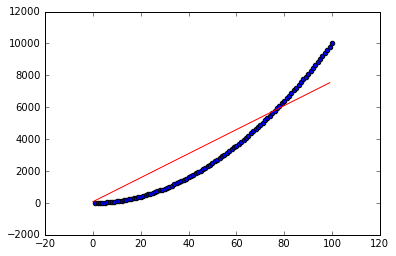

In [184]:
plt.scatter(T,S)
plt.plot(S_hat,'r')

In [177]:
inf.reset_ramsey(res)

<class 'statsmodels.stats.contrast.ContrastResults'>
<F test: F=array([[  2.92932626e+25]]), p=0.0, df_denom=96, df_num=4>

In [185]:
import statsmodels.formula.api as smf

In [ ]:
# smof.ols (OLS in lower case) accepts formulas and data in dataframe 

In [195]:
df = pd.DataFrame(T,S)
mod1 = smf.ols('S ~ T + np.square(T)', data = df)
res1 = mod1.fit()
res1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      S   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 9.629e+30
Date:                Fri, 03 Nov 2017   Prob (F-statistic):               0.00
Time:                        11:50:07   Log-Likelihood:                 2430.2
No. Observations:                 100   AIC:                            -4854.
Df Residuals:                      97   BIC:                            -4847.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      1.99e-12    2.1e-12      0.948      0.346   -2.18e-12    6.16e-12
T              3.73e-13   9.59e-14      3.889      0.000    1.83e-13    5.63e-13
np.square(T)     1.0000    9.2e-16   1.09e+15      0.000       1.000       1.000
==============================================================================
Omnibus:                       19.103   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               23.491
Skew:                           1.166   Prob(JB):                     7.93e-06
Kurtosis:                       3.444   Cond. No.                     1.39e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.39e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [201]:
S_hat = res1.predict(T)

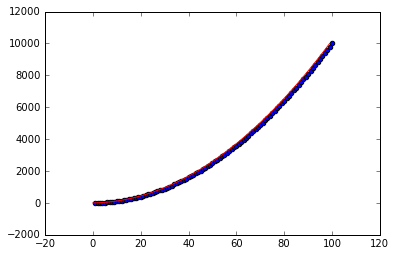

In [202]:
plt.scatter(T,S)
plt.plot(S_hat,'r')

In [ ]:
#Influence
#• DFBETAs, Cook’s D, influence plots, added-variable plots (partial regression plots)

In [225]:
# Cook’s Distance (another outlier test)
# https://uk.mathworks.com/help/stats/cooks-distance.html?searchHighlight=Cook%27s%20distance&s_tid=doc_srchtitle
# Cook’s distance is useful for identifying outliers in the X values (observations for predictor variables). 
#It also shows the influence of each observation on the fitted response values. 
#An observation with Cook’s distance larger than three times the mean Cook’s distance might be an outlier.
inf_test.cooks_d.mean()

0.0006769176063846982

In [228]:
cooks_d = inf_test.loc[inf_test['cooks_d']> 3*inf_test.cooks_d.mean(), 'cooks_d']

In [229]:
cooks_d.nlargest(10)

Date
2016-01-27    0.041907
2012-04-25    0.040430
2015-08-21    0.037175
2012-12-05    0.027396
2011-10-04    0.026022
2015-01-28    0.019985
2012-11-07    0.017071
2015-10-28    0.014908
2012-05-21    0.014294
2012-11-19    0.013167
Name: cooks_d, dtype: float64

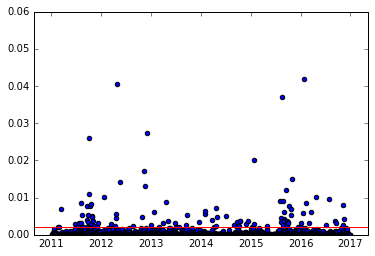

In [244]:
fig1, ax = plt.subplots()
plt.scatter(inf_test.index,inf_test['cooks_d'])
plt.ylim([0.00,0.06])
plt.axhline(3*inf_test.cooks_d.mean(),color='r')

In [253]:
#• DFBETAs
# https://uk.mathworks.com/help/stats/delete-1-statistics.html#btkvxq6-12
# Dfbetas for coefficient j and observation i is the ratio of the difference 
#in the estimate of coefficient j using all observations and the one obtained by removing observation i, 
# and the standard error of the coefficient estimate obtained by removing observation i.
difbetas = inf_test.iloc[:,:3]
difbetas.head()

,dfb_Mkt-RF,dfb_SMB,dfb_HML
Date,,,
2011-01-04,0.007443,-0.026817,-0.002188
2011-01-05,0.001075,0.009812,0.003823
2011-01-06,-0.000017,0.000581,0.002148
2011-01-07,0.001095,-0.006815,-0.008732
2011-01-10,-0.014591,0.040237,-0.004226


In [278]:
# A Dfbetas value larger than 3/sqrt(n) in absolute value 
# indicates that the observation has a large influence on the corresponding coefficient.
difbetas = difbetas.abs()
outliers = difbetas[difbetas > 3/(np.sqrt(len(difbetas)))]

In [279]:
outliers.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1509 entries, 2011-01-04 to 2016-12-30
Data columns (total 3 columns):
dfb_Mkt-RF    36 non-null float64
dfb_SMB       25 non-null float64
dfb_HML       35 non-null float64
dtypes: float64(3)
memory usage: 79.2 KB


In [280]:
outliers = outliers[(outliers['dfb_Mkt-RF'].notnull())| (outliers['dfb_SMB'].notnull())|(outliers['dfb_HML'].notnull())]

In [283]:
outliers.head()

,dfb_Mkt-RF,dfb_SMB,dfb_HML
Date,,,
2011-03-16,0.127794,0.107366,NaN
2011-07-20,NaN,NaN,0.090919
2011-08-04,0.091663,NaN,NaN
2011-08-09,0.140402,NaN,NaN
2011-08-11,0.120911,NaN,NaN


In [286]:
# A problem with DFBetas is that each observation has several measures of influence -one for each coecient n(k + 1) 
# Cook’s D overcomes the problem by presenting a single summary measure for each observation

In [ ]:
# Dffits) show the influence of each observation on the fitted response values. 
# Dffits values with an absolute value larger than 2*sqrt(p/n) might be influential.
# This approach combines studentized residuals and leverage values hii from the Hat Matrix

In [295]:
# Influence Plot
import statsmodels.graphics.regressionplots as stat_plots

In [ ]:
# NOT WORKING
# stat_plots.plot_added_variable(results,'Mkt-RF') 

In [349]:
model.exog_names

['Mkt-RF', 'SMB', 'HML']

TypeError: 'Figure' object does not support indexing

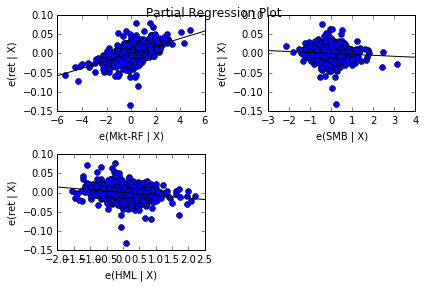

In [347]:
stat_plots.plot_partregress_grid(results)[1]
#A subplot is created for each explanatory variable given by exog_idx.
#The partial regression plot shows the relationship between the response
#and the given explanatory variable after removing the effect of all other
#explanatory variables in exog.